<a href="https://colab.research.google.com/github/vramya2021/Nextgrowthlabs_Assessment/blob/main/CustomerCheckin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
pd.options.display.max_columns = None
import io







In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving train_data_evaluation_part_2.csv to train_data_evaluation_part_2.csv


In [85]:
uploaded_test= files.upload()

Saving test_data_evaluation_part2.csv to test_data_evaluation_part2.csv


In [4]:
data = pd.read_csv(io.BytesIO(uploaded['train_data_evaluation_part_2.csv']))
print(data)

       Unnamed: 0     ID Nationality   Age  DaysSinceCreation  \
0               0      1         PRT  51.0                150   
1               1      2         PRT   NaN               1095   
2               2      3         DEU  31.0               1095   
3               3      4         FRA  60.0               1095   
4               4      5         FRA  51.0               1095   
...           ...    ...         ...   ...                ...   
82575       82575  82576         SWE  51.0                 12   
82576       82576  82577         SWE  50.0                 12   
82577       82577  82578         DEU  50.0                 12   
82578       82578  82579         PRT   NaN                 12   
82579       82579  82580         DEU  17.0                 12   

       AverageLeadTime  LodgingRevenue  OtherRevenue  BookingsCanceled  \
0                   45          371.00         105.3                 1   
1                   61          280.00          53.0                 0 

In [6]:
##Copy the dataset
df= data.copy()

In [21]:
df.columns


Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [22]:
df.drop(columns= ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],inplace=True)


In [24]:
df.dtypes

Unnamed: 0               int64
ID                       int64
Nationality             object
Age                    float64
DaysSinceCreation        int64
AverageLeadTime          int64
LodgingRevenue         float64
OtherRevenue           float64
BookingsCanceled         int64
BookingsNoShowed         int64
BookingsCheckedIn        int64
PersonsNights            int64
RoomNights               int64
DaysSinceLastStay        int64
DaysSinceFirstStay       int64
DistributionChannel     object
MarketSegment           object
dtype: object

In [209]:
def get_count(series, limit=None):

    #INPUT:
       # series: Pandas Series (Single Column from DataFrame)
        #limit: If value given, limit the output value to first limit samples.
    #OUTPUT:
       # x = Unique values
        #y = Count of unique values
   if limit != None:
      series = series.value_counts()[:limit]
   else:
      series = series.value_counts()   

   x = series.index
   y = series/series.sum()*100 
   return x.values, y.values

In [211]:
x,y

(array([ 1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 29, 15, 23,
        14, 25, 17, 66, 26, 57, 40, 18, 24, 19, 20, 34]),
 array([7.47602325e+01, 2.34851054e+01, 1.38169048e+00, 1.59844999e-01,
        7.14458707e-02, 2.42189392e-02, 2.42189392e-02, 1.93751514e-02,
        1.21094696e-02, 1.08985226e-02, 8.47662872e-03, 7.26568176e-03,
        4.84378784e-03, 4.84378784e-03, 3.63284088e-03, 3.63284088e-03,
        2.42189392e-03, 2.42189392e-03, 1.21094696e-03, 1.21094696e-03,
        1.21094696e-03, 1.21094696e-03, 1.21094696e-03, 1.21094696e-03,
        1.21094696e-03, 1.21094696e-03, 1.21094696e-03, 1.21094696e-03,
        1.21094696e-03]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


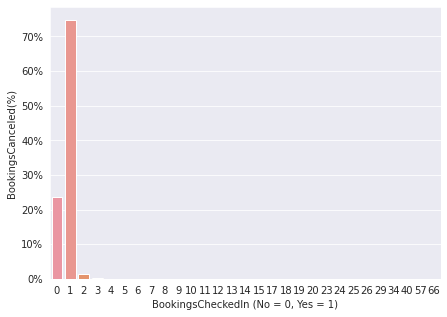

In [212]:
plot(x,y, x_label='BookingsCheckedIn (No = 0, Yes = 1)', y_label='BookingsCanceled(%)')

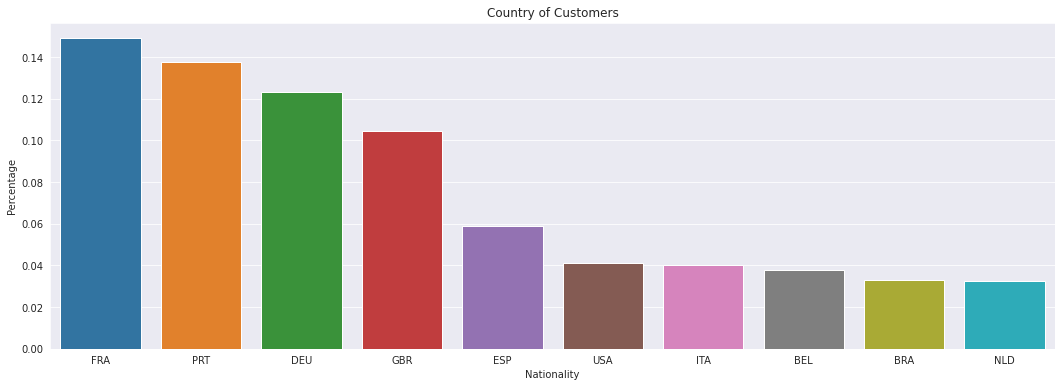

In [213]:
plt.figure(figsize=(18,6))
country_booking = data['Nationality'].value_counts(normalize=True).rename_axis('Nationality').reset_index(name='Percentage')
sns.barplot(x='Nationality', y='Percentage', data = country_booking.head(10))
plt.title('Country of Customers')
plt.show()

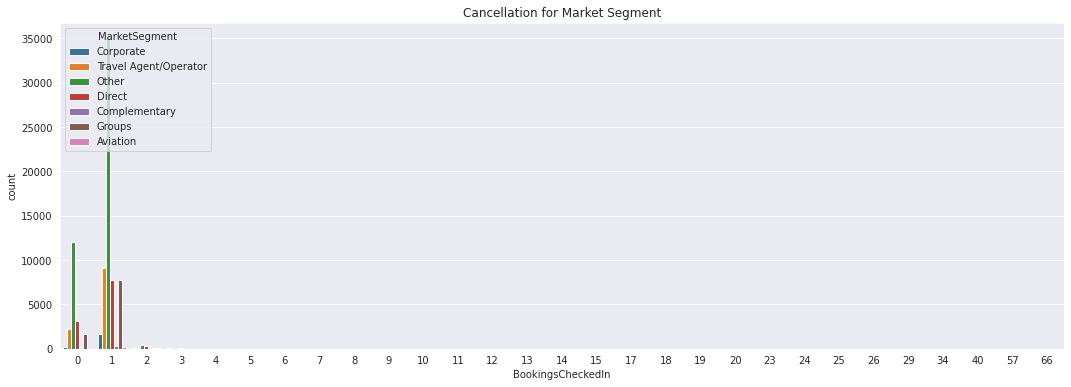

In [214]:
plt.figure(figsize=(18,6))

plt.legend(loc = 1)

sns.countplot(data=data,x='BookingsCheckedIn',hue='MarketSegment')
plt.title('Cancellation for Market Segment')
plt.show()

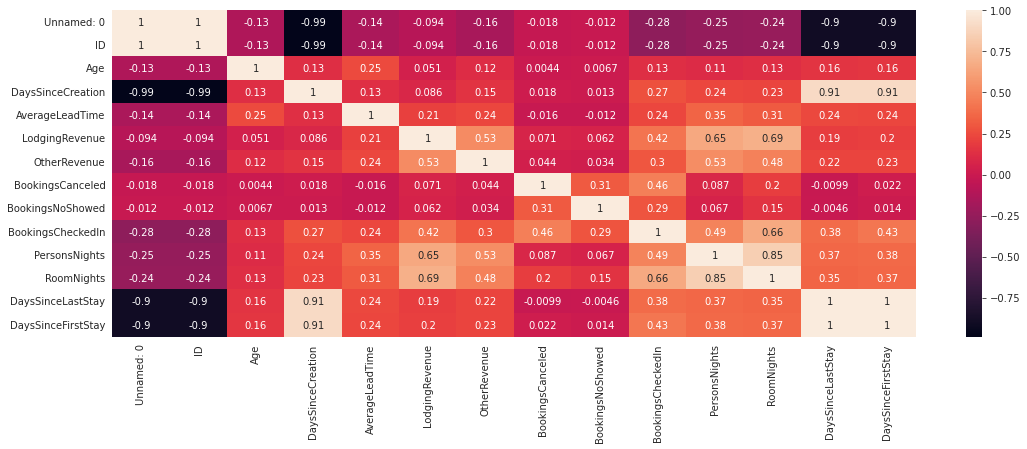

In [215]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(df_subset.corr(),annot=True, ax=ax);

In [216]:
data1 = pd.read_csv(io.BytesIO(uploaded_test['test_data_evaluation_part2.csv']))
print(data1)

     Unnamed: 0     ID Nationality   Age  DaysSinceCreation  AverageLeadTime  \
0         82590  82591         SGP  47.0                 11                0   
1         82591  82592         SGP  16.0                 11              130   
2         82592  82593         SGP  15.0                 11                0   
3         82593  82594         SGP  12.0                 11                0   
4         82594  82595         PRT   NaN                 11                0   
..          ...    ...         ...   ...                ...              ...   
995       83585  83586         ITA  54.0                  0                0   
996       83586  83587         IRL  47.0                  0              109   
997       83587  83588         IRL  53.0                  0                0   
998       83588  83589         IRL  85.0                  0              109   
999       83589  83590         IRL  13.0                  0                0   

     LodgingRevenue  OtherRevenue  Book

In [217]:
df_test= data1.copy()

In [218]:
df_test.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [219]:
#df_test.drop(columns= ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       #'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       #'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       #'SRNoAlcoholInMiniBar', 'SRQuietRoom'],inplace=True)

In [237]:
df_test.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [239]:
#def transform(dataframe):
  ## Import LabelEncoder from sklearn
    #from sklearn.preprocessing import LabelEncoder
    #df_le = df.copy()
    #le = LabelEncoder()

    #df = transform(df)     
   

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split 
def data_split(df_test, label):
  X = df_test.drop(label, axis=1)
  X= X.reshape(1,-1)
  Y = df_test[label]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=41)
  df_test.drop(columns = ['Nationality'])
  logreg=LogisticRegression()
  logreg.fit(X_train,Y_train)
  prediction_logreg=logreg.predict(X_test)
  print(classification_report(Y_test,prediction_logreg))